# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [31]:
from sklearn.datasets import fetch_california_housing
import numpy as np

dataset  = fetch_california_housing(as_frame = True)

In [2]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


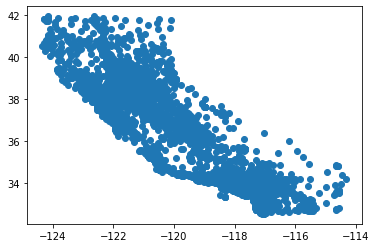

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [4]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [5]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## Kmeans

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
labels_2 = KMeans(2, random_state=42).fit_predict(X)
labels_4 = KMeans(4,random_state=42).fit_predict(X)
labels_6 = KMeans(6,random_state=42).fit_predict(X)
labels_8 = KMeans(8,random_state=42).fit_predict(X)

Text(0.5, 1.0, 'k=8')

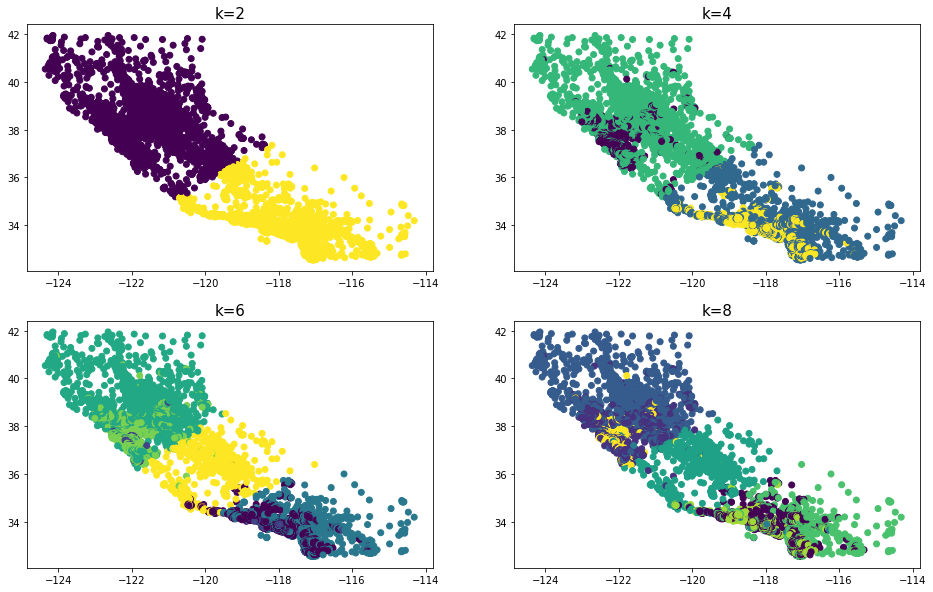

In [20]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
ax1.scatter(X['Longitude'], X['Latitude'], c=labels_2)
ax1.set_title('k=2',size=15)

ax2.scatter(X['Longitude'], X['Latitude'], c=labels_4)
ax2.set_title('k=4',size=15)

ax3.scatter(X['Longitude'], X['Latitude'], c=labels_6)
ax3.set_title('k=6',size=15)

ax4.scatter(X['Longitude'], X['Latitude'], c=labels_8)
ax4.set_title('k=8',size=15)


## Determining the K-Means Cluster Number - Inertia

 En iyi cluster sayısına nasıl karar verebiliriz? K-Means unsupervised task olduğu için elimizde accuracy gibi bir ölçek yok. En iyi modeli seçmek için kullanılan yöntemlerden birisi ise inertia değeridir. Inertia değeri, her bir noktanın ait olduğu cluster merkezi ile arasındaki mesafesin karelerinin toplamı ile hesaplanır. En düşük inertia en iyi modeldir diyemeyiz çünkü (doğal olarak) cluster sayısı arttıkça inertia değeri düşecektir.


In [21]:
max_cluster = 8

all_experiments = []

for n_cluster in range(1,max_cluster,1):
    kmeans = KMeans(n_clusters=n_cluster + 1, random_state=42)
    kmeans.fit(X)
    all_experiments.append(kmeans)

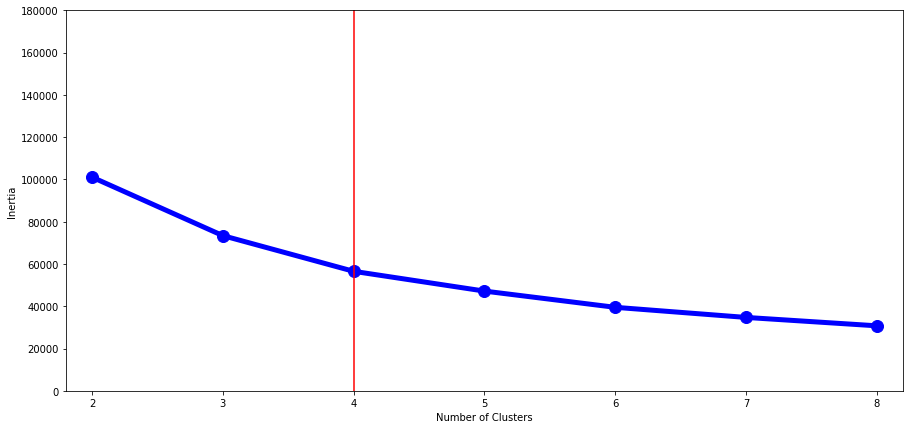

In [40]:
inertias = [experiment.inertia_ for experiment in all_experiments]
plt.figure(figsize=(15, 7))
plt.plot([2, 3, 4, 5, 6, 7, 8], inertias, 'bo-', linewidth=5, markersize=12)
plt.axis([1.8, 8.2, 0, 180000])
plt.axvline(x=4,color="r")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Silhouette Score

Silhouette skoru, verideki her bir noktanin silhouette katsayının ortalaması ile hesaplanır. Bir noktanın silhouette katsayısı ise $(b - a)/\max(a, b)$ formülü ile hesaplanır.

- $a$ = Noktanın aynı cluster içindeki diğer noktalara uzaklığı
- $b$ = Noktanın kendisine en yakın diğer cluster içindeki noktalara uzaklığı

Silhouette katsayısı -1 ile 1 arasında değişir.

- +1'e yakın ise bu nokta bulunduğu clusterda yeri iyi ve diğer clusterlara uzaktır
- 0'a yakın ise bu nokta atandığı clustur'ın sınırlarına yakın bir yerdedir
- -1'e yakın ise bu nokta yanlış cluster'a atanmış olabilir


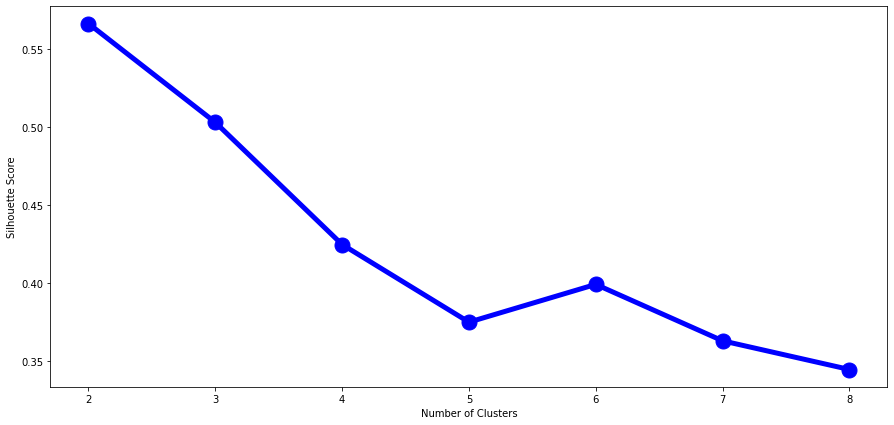

In [42]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, experiment.labels_) for experiment in all_experiments]
plt.figure(figsize=(15, 7))
plt.plot([2, 3, 4, 5, 6, 7, 8], silhouette_scores, 'bo-', linewidth=5, markersize=15)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

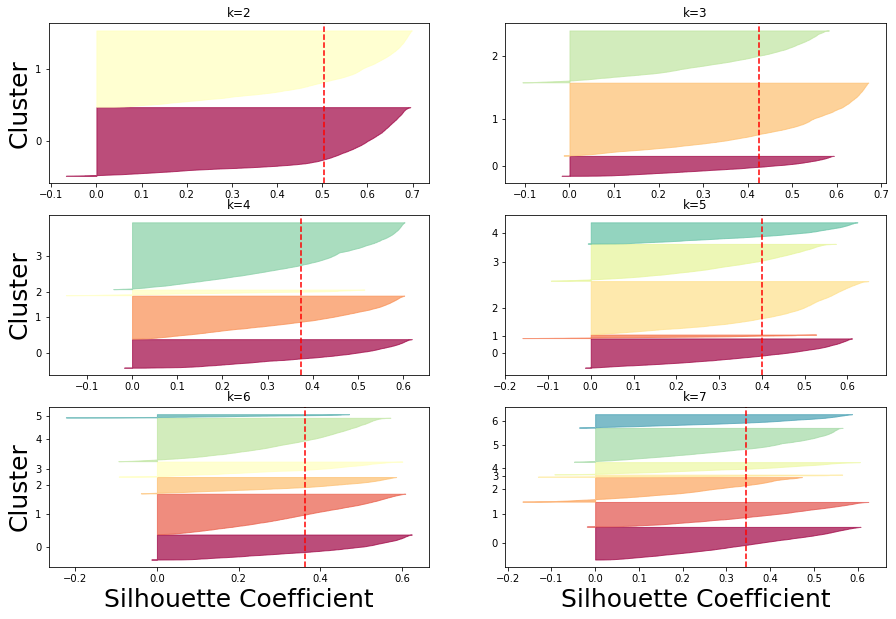

In [45]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
silhouette_coefficients = [silhouette_samples(X, experiment.labels_) for experiment in all_experiments]

plt.figure(figsize=(15,10))

for k in range(2,8,1):
    plt.subplot(3,2,k-1)
    padding = 50
    pos = padding
    ticks = []
    labels = all_experiments[k-1].labels_
    for i in range(k):

        coefficients = silhouette_coefficients[k-1][labels == i]
        coefficients.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coefficients)), 0, coefficients,
                          facecolor=color, edgecolor=color, alpha=0.7)
        tick = pos + len(coefficients) // 2
        ticks.append(tick)
        pos += len(coefficients) + padding

    if k in[2,4,6]:
        plt.ylabel("Cluster", fontsize = 25)


    if k in [6,7]:
        plt.xlabel("Silhouette Coefficient", fontsize = 25)

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.title(f'k={k}')
    plt.axvline(x = silhouette_scores[k-1], color = 'red', linestyle = '--')

plt.show()